In [56]:
"""
#  SSS  K   K        SSS  H   H IIIII EEEEE L     DDDD  EEEEE RRRR   SSS        4   4 TTTTT H   H       RRRR   OOO   OOO  K   K IIIII EEEEE  SSS  
# S     K  K        S     H   H   I   E     L     D   D E     R   R S           4   4   T   H   H       R   R O   O O   O K  K    I   E     S     
#  SSS  KKK          SSS  HHHHH   I   EEEEE L     D   D EEEEE RRRR   SSS        44444   T   HHHHH       RRRR  O   O O   O KKK     I   EEEEE  SSS  
#     S K  K            S H   H   I   E     L     D   D E     R  R      S           4   T   H   H       R  R  O   O O   O K  K    I   E         S 
# SSSS  K   K       SSSS  H   H IIIII EEEEE LLLLL DDDD  EEEEE R   R SSSS            4   T   H   H       R   R  OOO   OOO  K   K IIIII EEEEE SSSS  

1차 팀 프로젝트 6조 HelloHome 

repository master   :   박시훈(cooperear)

file_name           :   final_test.ipynb

"""


'\n#  SSS  K   K        SSS  H   H IIIII EEEEE L     DDDD  EEEEE RRRR   SSS        4   4 TTTTT H   H       RRRR   OOO   OOO  K   K IIIII EEEEE  SSS  \n# S     K  K        S     H   H   I   E     L     D   D E     R   R S           4   4   T   H   H       R   R O   O O   O K  K    I   E     S     \n#  SSS  KKK          SSS  HHHHH   I   EEEEE L     D   D EEEEE RRRR   SSS        44444   T   HHHHH       RRRR  O   O O   O KKK     I   EEEEE  SSS  \n#     S K  K            S H   H   I   E     L     D   D E     R  R      S           4   T   H   H       R  R  O   O O   O K  K    I   E         S \n# SSSS  K   K       SSSS  H   H IIIII EEEEE LLLLL DDDD  EEEEE R   R SSSS            4   T   H   H       R   R  OOO   OOO  K   K IIIII EEEEE SSSS  \n\n1차 팀 프로젝트 6조 HelloHome \n\nrepository master   :   박시훈(cooperear)\n\nfile_name           :   final_test.ipynb\n\n'

In [42]:
#jupyter 전용
import os
os.getcwd()
import sys
sys.path.append('1_team_project_with_using_api_and_df\HelloHome\AbandonedAnimals.py')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
from AbandonedAnimals import AbandonedAnimals


In [44]:
a = AbandonedAnimals()
#df =  a.fetch_abandoned_animals() #전체데이터
# df = a.fetch_abandoned_animals(20250601,20250730) #기간 상관있게,str 처리되게 함 날짜 포멧팅:YYYYMMDD
df = a.fetch_abandoned_animals('20250730','20250730') #기간 상관있게, str 써도 됨



https://apis.data.go.kr/1543061/abandonmentPublicService_v2/abandonmentPublic_v2?serviceKey=jWovxlcK3oev1Weeu%2FaHCUNUMIkk%2FCnZbPnX%2BQn1dcMCl9d%2BpeGX3Dh90VhNCM59BHDljQckSEiDij1B7k0U5w%3D%3D&pageNo=1&bgupd=20250730&enupd=20250730&numOfRows=1000
요청 중: page 1
https://apis.data.go.kr/1543061/abandonmentPublicService_v2/abandonmentPublic_v2?serviceKey=jWovxlcK3oev1Weeu%2FaHCUNUMIkk%2FCnZbPnX%2BQn1dcMCl9d%2BpeGX3Dh90VhNCM59BHDljQckSEiDij1B7k0U5w%3D%3D&pageNo=2&bgupd=20250730&enupd=20250730&numOfRows=1000
요청 중: page 2
데이터 종료
총 수집 데이터 수: 499


In [45]:
#df의 값은 pandas.DataFrame
print(f'{type(df)}')

<class 'pandas.core.frame.DataFrame'>


In [46]:
#df의 값은 pandas.DataFrame
print(f'{type(df)}')

<class 'pandas.core.frame.DataFrame'>


In [47]:
# 원본 dataframe을 불러올 수도 있음(trouble shooting: Original_Data_Backup개념)
original_df= a.dataframe.copy()
print(f'{type(df)}')

<class 'pandas.core.frame.DataFrame'>


In [48]:
original_df.columns
original_df.to_json('Full_dataframe.json')


Malgun Gothic


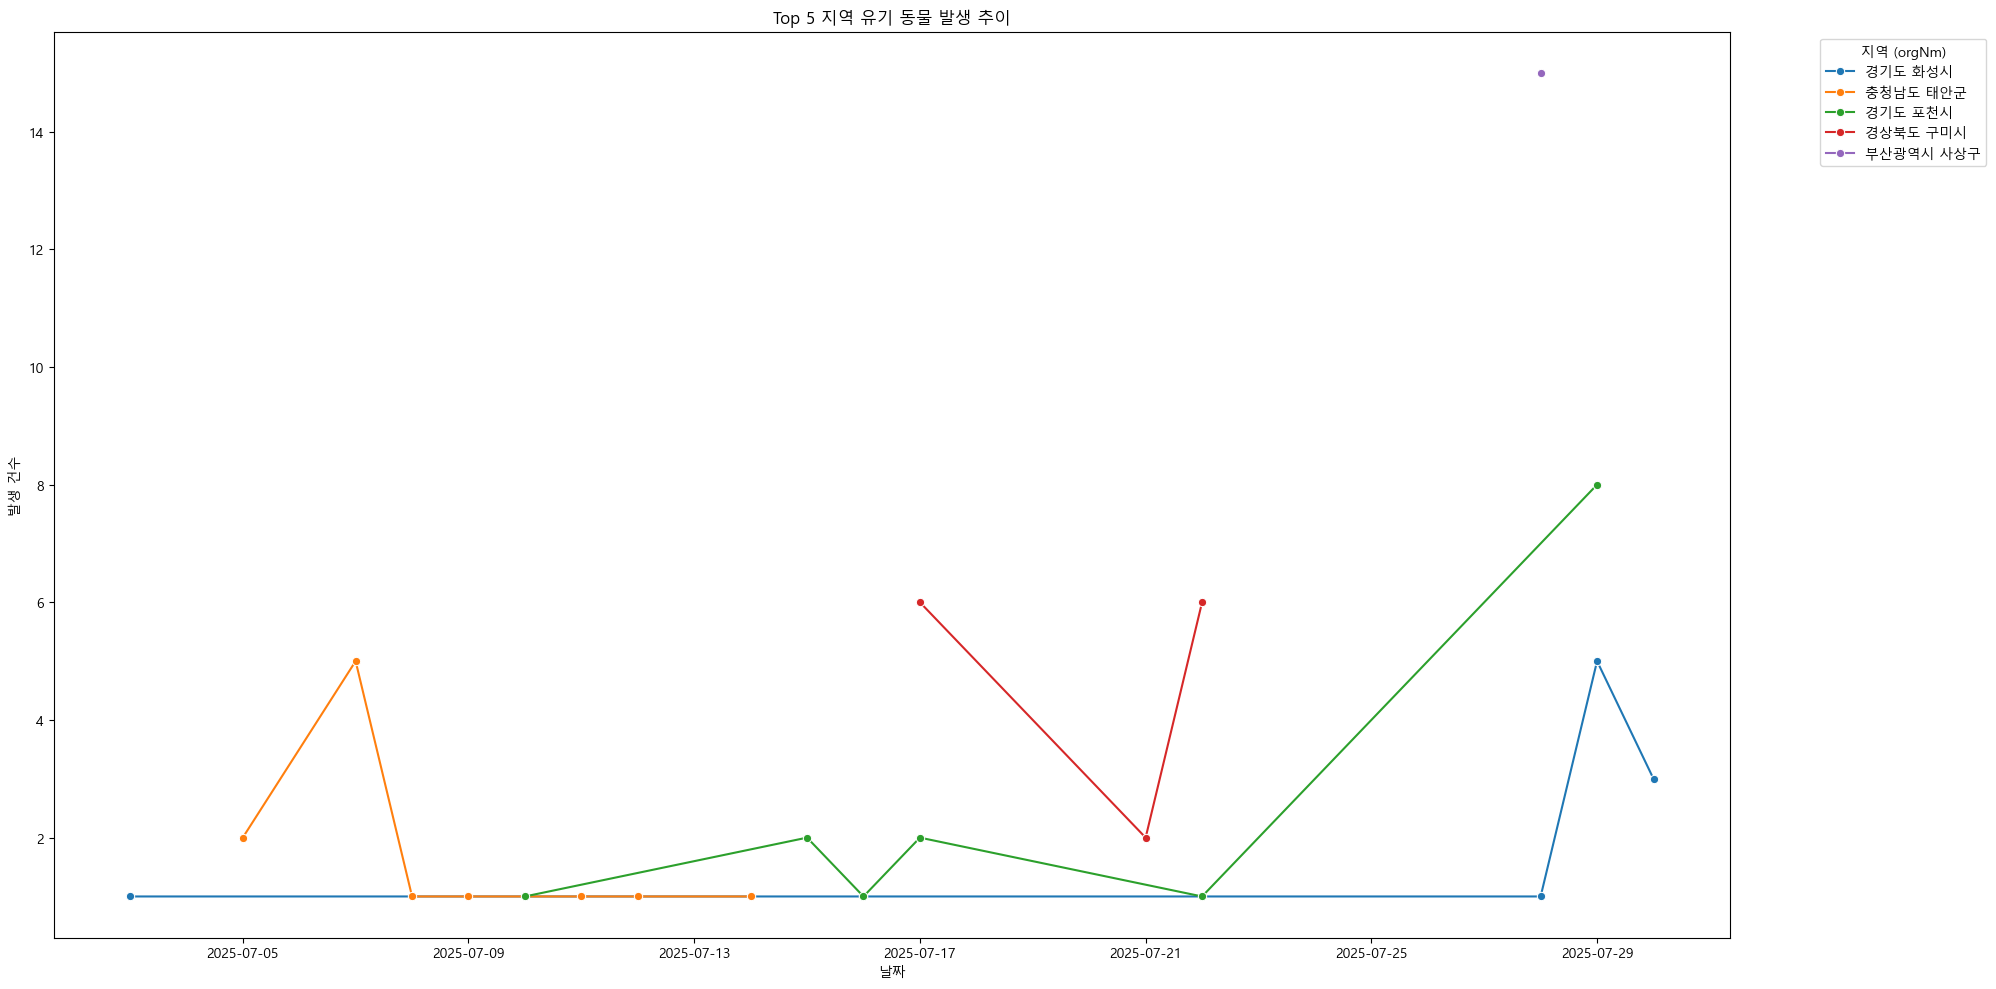

In [54]:

import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)
# 날짜 변환
df['happenDt'] = pd.to_datetime(df['happenDt'], format='%Y%m%d')

# orgNm 상위 5개 추출
top5_orgs = df['orgNm'].value_counts().nlargest(5).index
df_top = df[df['orgNm'].isin(top5_orgs)]

# 날짜별 + 지역별 count 집계
grouped = (
    df_top.groupby([df_top['happenDt'].dt.to_period('D'), 'orgNm'])
    .size()
    .reset_index(name='count')
)
grouped['happenDt'] = grouped['happenDt'].dt.to_timestamp()

# 시각화
plt.figure(figsize=(20, 10))
sns.lineplot(data=grouped, x='happenDt', y='count', hue='orgNm', marker='o')
plt.title('Top 5 지역 유기 동물 발생 추이')
plt.xlabel('날짜')
plt.ylabel('발생 건수')
plt.legend(title='지역 (orgNm)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [50]:
df[['upKindNm','kindNm','popfile1','colorCd','age','sexCd','neuterYn','careRegNo','weight','careTel','careAddr']]
#df



,upKindNm,kindNm,popfile1,colorCd,age,sexCd,neuterYn,careRegNo,weight,careTel,careAddr
0,개,푸들,http://openapi.animal.go.kr/openapi/service/re...,갈색,2020(년생),F,N,369569202000001,3.75(Kg),010-4435-3720,세종특별자치시 전동면 미륵당1길 188 (전동면)
1,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,적갈&검정&흰색,2021(년생),F,N,348527200900001,4.5(Kg),055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터
2,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,검정&흰색,2025(60일미만)(년생),F,N,348527200900001,0.1(Kg),055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터
3,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,갈색&흰색,2025(60일미만)(년생),M,N,348527200900001,0.1(Kg),055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터
4,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,검정&흰색,2025(60일미만)(년생),M,N,348527200900001,0.1(Kg),055-225-5701,경상남도 창원시 성산구 공단로474번길 117 (상복동) 창원동물보호센터
...,...,...,...,...,...,...,...,...,...,...,...
494,개,믹스견,http://openapi.animal.go.kr/openapi/service/re...,갈색&흰색,2025(년생),F,N,341417201800001,2(Kg),031-770-2337,경기도 양평군 양평읍 농업기술센터길 59-1
495,개,포메라니안,http://openapi.animal.go.kr/openapi/service/re...,흰색,2023(년생),M,N,311304200900003,2.4(Kg),031-867-9119,경기도 양주시 남면 감악산로 63-37 (남면)
496,개,말티즈,http://openapi.animal.go.kr/openapi/service/re...,흰색,2020(년생),F,U,344449202100001,2(Kg),010-5913-5119,충청남도 천안시 동남구 목천읍 충절로 577 문의전화 : 입양(010-5913-5...
497,개,말티즈,http://openapi.animal.go.kr/openapi/service/re...,흰색,2018(년생),M,Y,327342201400001,6(Kg),053-964-6258,대구광역시 동구 금강로 151-13 (금강동)


In [55]:
df['specialMark']

0                                           세종식물원내에서  발견
1      신고자께서 목줄 채워주심, 갈색 양말, 작은 어금니가 양쪽 다 없음, 귀여운 외모와...
2      25-520 애기.이제 막 태어남. 엄마가 정성스레 보살피는중..더 크면 사진수정하...
3      25-520 애기.이제 막 태어남. 엄마가 정성스레 보살피는중..더 크면 사진수정하...
4      25-520 애기.이제 막 태어남. 엄마가 정성스레 보살피는중..더 크면 사진수정하...
                             ...                        
494       25-256 자견, 남매 중 가장 갈색이 짙음. 겁이 살짝 있으나 사람을 잘 따름.
495    온순. 얌전. 약간 겁 있음. 미용 흔적. 치석 없음.부정교합. 양 슬개골 심함. ...
496                  피부염으로 인한 탈모 심함, 겁 있음, 좌측 대퇴 원위부 사골절
497                                                   미용
498                                             초록 목줄 착용
Name: specialMark, Length: 499, dtype: object

In [52]:
df.columns

Index(['desertionNo', 'happenDt', 'happenPlace', 'kindFullNm', 'upKindCd',
       'upKindNm', 'kindCd', 'kindNm', 'colorCd', 'age', 'weight', 'noticeNo',
       'noticeSdt', 'noticeEdt', 'popfile1', 'popfile2', 'processState',
       'sexCd', 'neuterYn', 'specialMark', 'careRegNo', 'careNm', 'careTel',
       'careAddr', 'careOwnerNm', 'orgNm', 'updTm'],
      dtype='object')

In [60]:
df.to_json("df_cleaned.json")

In [ ]:
d

In [ ]:
df.loc[df['processState'].str.contains('안락사',na=False)]
df.loc[df['processState'].str.contains('자연사',na=False)]
df.loc[df['processState'].str.contains('자연사',na=False)]

,desertionNo,happenDt,happenPlace,kindFullNm,upKindCd,upKindNm,kindCd,kindNm,colorCd,age,...,sexCd,neuterYn,specialMark,careRegNo,careNm,careTel,careAddr,careOwnerNm,orgNm,updTm
106,441386202500978,2025-07-30,삼정동 19-26,[고양이] 한국 고양이,422400,고양이,000200,한국 고양이,레몬색&흰색,2023(년생),...,M,N,구내염. 심한 탈수. 악액질 상태. 기립불능. 전신 개미감염. 예후극히불량.,341386201800004,정샘동물병원,032-323-4999,"경기도 부천시 원미구 중동로 244 (중동, 상록센트럴타워) 109,110호",정종수,경기도 부천시,2025-07-30 17:47:55.0
415,444462202500622,2025-07-14,마검포길 104-46,[개] 믹스견,417000,개,000114,믹스견,검정&흰색,2019(년생),...,M,N,"온몸에 피부질환 있음, 예민함",344462200900001,최동물병원,041-672-0346,충청남도 태안군 태안읍 남문리 504-6,최기중,충청남도 태안군,2025-07-30 11:26:35.0
424,444462202500620,2025-07-12,원북면 음포길 265,[개] 믹스견,417000,개,000114,믹스견,황갈색,2023(년생),...,M,N,순하고 잘따름,344462200900001,최동물병원,041-672-0346,충청남도 태안군 태안읍 남문리 504-6,최기중,충청남도 태안군,2025-07-30 11:26:09.0
437,444462202500619,2025-07-11,동산길 15-23,[개] 믹스견,417000,개,000114,믹스견,흰색&황갈색,2022(년생),...,F,N,순하고 잘따름,344462200900001,최동물병원,041-672-0346,충청남도 태안군 태안읍 남문리 504-6,최기중,충청남도 태안군,2025-07-30 11:25:44.0
441,427342202500564,2025-07-11,진인동 409,[개] 믹스견,417000,개,000114,믹스견,크림색,2024(년생),...,M,N,"야생견, 진드기 감염,영양상태 불량, 경계함",327342201400001,대구유기동물보호센터,053-964-6258,대구광역시 동구 금강로 151-13 (금강동),임규호,대구광역시 동구,2025-07-30 09:25:28.0
442,427342202500563,2025-07-11,백안동 산 71-2,[개] 믹스견,417000,개,000114,믹스견,흰색,2024(년생),...,M,N,"야생견, 진드기 감염,영양상태 불량, 경계함",327342201400001,대구유기동물보호센터,053-964-6258,대구광역시 동구 금강로 151-13 (금강동),임규호,대구광역시 동구,2025-07-30 09:25:17.0
443,426327202500086,2025-07-11,고관로 40,[개] 시바,417000,개,000100,시바,황갈색,2020(년생),...,M,N,얼굴부위 흰색/ 검정색 목줄 착용,326327202400001,동구종합동물병원,051-441-6383,부산광역시 동구 망양로 835-1 (수정동),전현준,부산광역시 동구,2025-07-30 16:54:33.0
455,444462202500612,2025-07-09,양잠 1리 적돌길 인근,[개] 믹스견,417000,개,000114,믹스견,흰색&황갈색,2024(년생),...,F,N,매우 예민함,344462200900001,최동물병원,041-672-0346,충청남도 태안군 태안읍 남문리 504-6,최기중,충청남도 태안군,2025-07-30 11:25:11.0
458,427342202500558,2025-07-09,율하 119,[개] 믹스견,417000,개,000114,믹스견,검정 황갈색&흰색,2016(년생),...,M,N,등에 길게 상처 있음,327342201400001,대구유기동물보호센터,053-964-6258,대구광역시 동구 금강로 151-13 (금강동),임규호,대구광역시 동구,2025-07-30 09:23:03.0
459,450650202501779,2025-07-08,서귀포시 대정읍 평화로69번길124-4,[개] 믹스견,417000,개,000114,믹스견,흰색,2025(60일미만)(년생),...,M,N,개체관리번호 1469 -2개월,350650201200001,제주 동물보호센터,064-710-4065,제주특별자치도 제주시 첨단동길 184-14 (용강동),김은주,제주특별자치도,2025-07-30 11:11:40.0
